In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from bidict import bidict
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

In [2]:
ENCODER = bidict({
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6,
    'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12,
    'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18,
    'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24,
    'Y': 25, 'Z': 26
})

In [3]:
labels = np.load('../data/labels.npy')
labels = np.array([ENCODER[x] for x in labels])
labels.shape

(260,)

In [4]:
imgs = np.load('../data/images.npy')
imgs = imgs.astype("float32") / 255
imgs.shape

(260, 50, 50)

In [37]:
# plt.figure()
# plt.imshow(imgs[0])
# plt.grid(False)
# plt.show()

In [5]:
imgs = np.expand_dims(imgs, -1)

In [6]:
labels, imgs = shuffle(labels, imgs)
split = .75

labels_train = labels[:int(len(labels) * split)]
labels_test = labels[int(len(labels) * split):]

imgs_train = imgs[:int(len(imgs) * split)]
imgs_test = imgs[int(len(imgs) * split):]

In [13]:
batch_size = 16
epochs = 20

model = keras.Sequential([
    keras.Input(shape=(50, 50, 1)),
    layers.Conv2D(256, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(512, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(1024, kernel_size=5, activation='relu'),
    layers.MaxPooling2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(len(ENCODER)+1, activation='softmax')
])

In [14]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2)
optimizer = keras.optimizers.Adam()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [15]:
model.fit(imgs_train,
          labels_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(imgs_test, labels_test),
          callbacks=[early_stopping])

Epoch 1/20
13/13 [==============================] - 31s 2s/step - loss: 3.3173 - accuracy: 0.0821 - val_loss: 3.1758 - val_accuracy: 0.2615
Epoch 2/20
13/13 [==============================] - 29s 2s/step - loss: 2.4862 - accuracy: 0.3538 - val_loss: 1.2442 - val_accuracy: 0.5846
Epoch 3/20
13/13 [==============================] - 39s 3s/step - loss: 0.8127 - accuracy: 0.7385 - val_loss: 0.6422 - val_accuracy: 0.7846
Epoch 4/20
13/13 [==============================] - 28s 2s/step - loss: 0.3619 - accuracy: 0.8872 - val_loss: 0.1471 - val_accuracy: 0.9692
Epoch 5/20
13/13 [==============================] - 27s 2s/step - loss: 0.0897 - accuracy: 0.9692 - val_loss: 0.0628 - val_accuracy: 0.9692
Epoch 6/20
13/13 [==============================] - 28s 2s/step - loss: 0.0363 - accuracy: 0.9897 - val_loss: 0.0257 - val_accuracy: 1.0000
Epoch 7/20
13/13 [==============================] - 27s 2s/step - loss: 0.0711 - accuracy: 0.9744 - val_loss: 0.0158 - val_accuracy: 1.0000
Epoch 8/20
13/13 [==

In [16]:
labels_pred = np.argmax(model.predict(imgs_test), axis=-1)

In [17]:
cm = confusion_matrix(labels_test, labels_pred, labels=list(ENCODER.inverse.keys()))

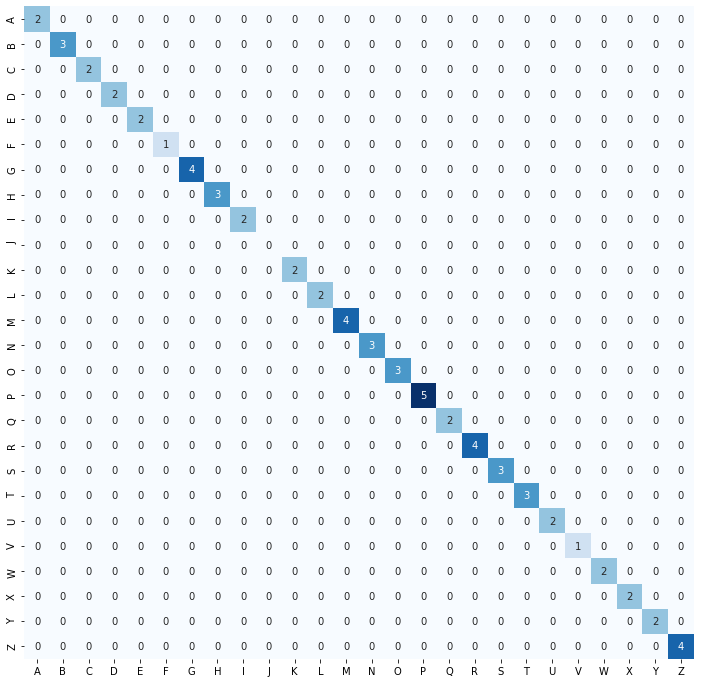

In [18]:
plt.figure(figsize=(12, 12))
sns.heatmap(cm, annot=True, cbar=False, cmap="Blues", xticklabels=list(ENCODER.keys()), yticklabels=list(ENCODER.keys()))
plt.show()

In [19]:
model.save('../letter.model')

INFO:tensorflow:Assets written to: ../letter.model/assets
